In [1]:
import os
import numpy as np
import pandas as pd
import ast
import torch
import PIL
from tqdm.auto import tqdm
import shutil as sh
from pathlib import Path
import random

from IPython.display import Image, clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Pip install (recommended)
!pip install ultralytics

from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5016.7/8062.4 GB disk)

OS                  Linux-5.15.133+-x86_64-with-glibc2.35
Environment         Kaggle
Python              3.10.12
Install             pip
RAM                 31.36 GB
CPU                 Intel Xeon 2.00GHz
CUDA                11.8

matplotlib          ✅ 3.7.2>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.5.0>=7.1.2
pyyaml              ✅ 6.0>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.7.3>=1.4.1
torch               ✅ 2.0.0>=1.8.0
torchvision         ✅ 0.15.1>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.12.2>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


In [3]:
!pip install albumentations==1.0.3
display.clear_output()
!pip show albumentations

Name: albumentations
Version: 1.0.3
Summary: Fast image augmentation library and easy to use wrapper around other libraries
Home-page: https://github.com/albumentations-team/albumentations
Author: Buslaev Alexander, Alexander Parinov, Vladimir Iglovikov, Eugene Khvedchenya, Druzhinin Mikhail
Author-email: 
License: MIT
Location: /opt/conda/lib/python3.10/site-packages
Requires: numpy, opencv-python-headless, PyYAML, scikit-image, scipy
Required-by: 


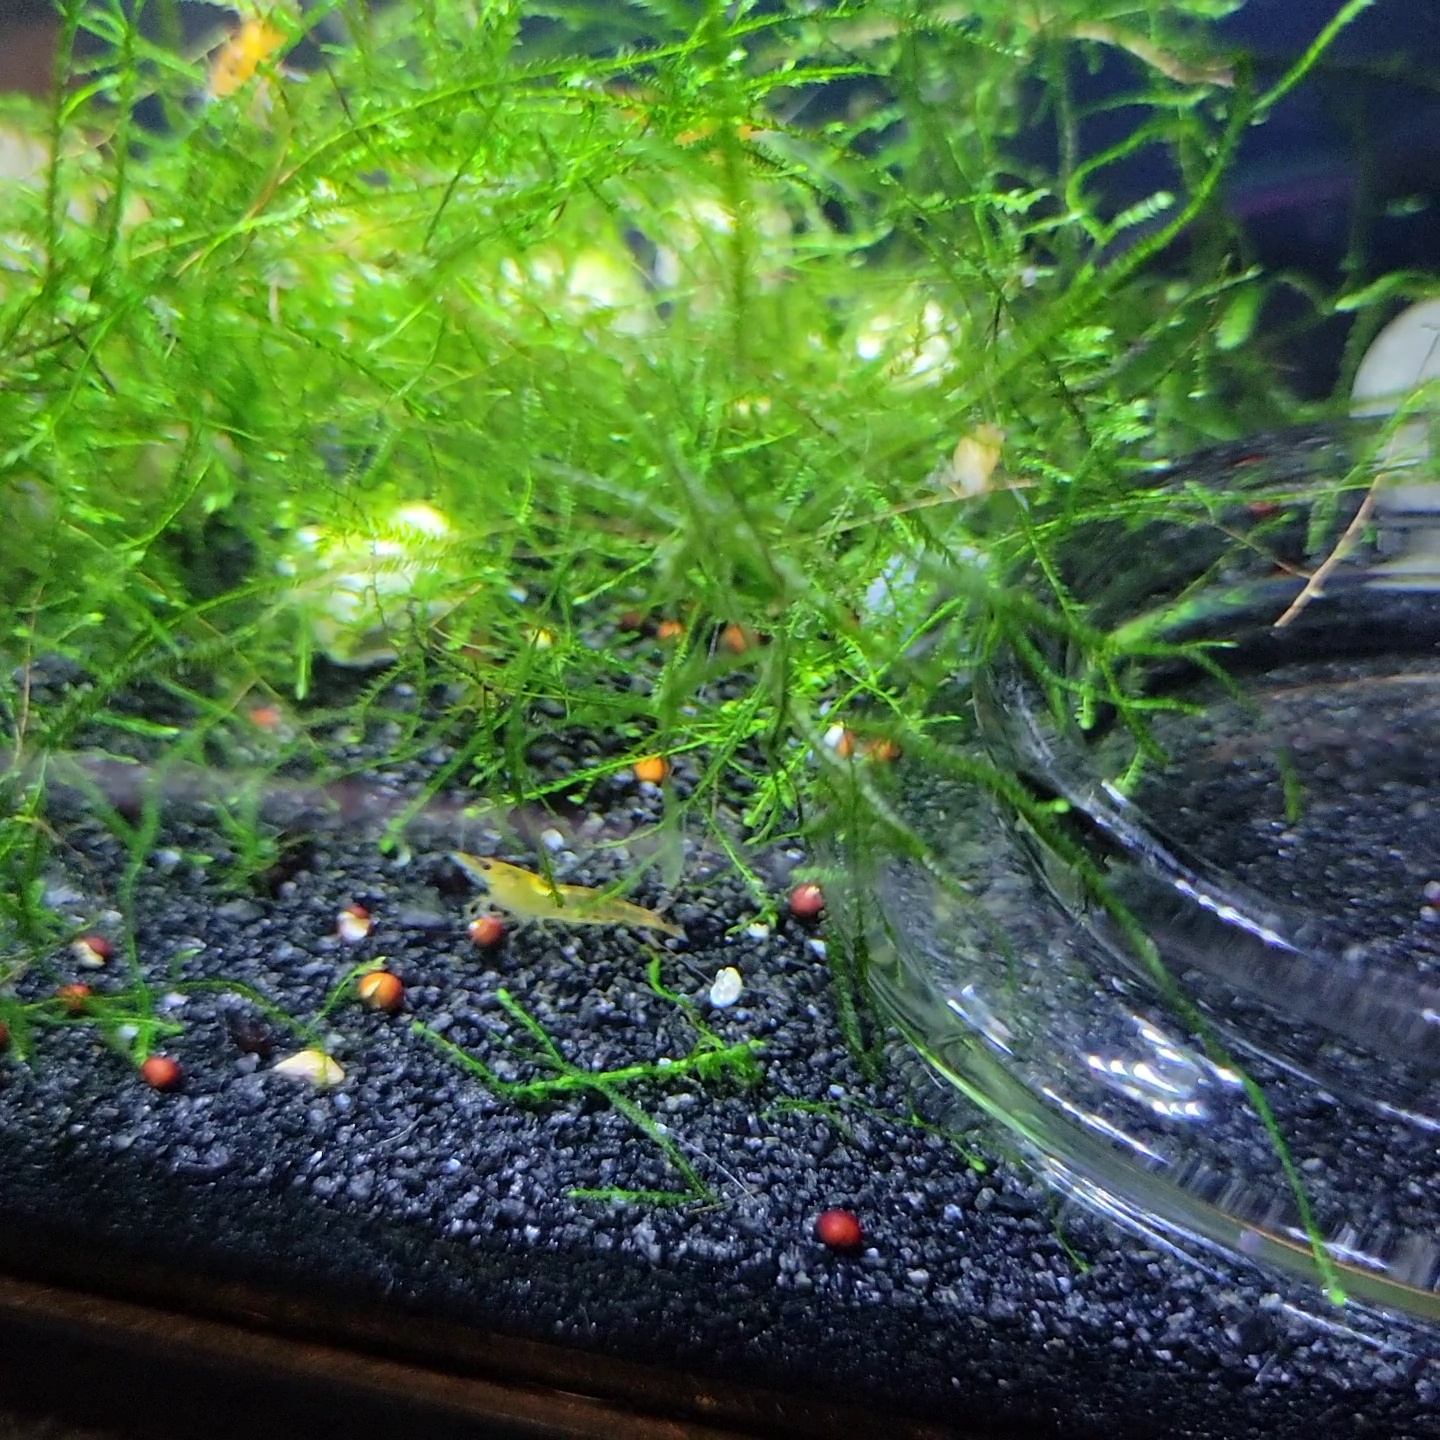

In [4]:
DATA_DIR = Path('/kaggle/input/shrimp-dataset/project-10-at-2023-09-26-17-38-b449e4f8')
img_list = list(DATA_DIR.glob('images/*.jpg'))
pickone = random.choice(img_list)
display.Image(pickone)

In [5]:
print(f"Found {len(img_list)} images files in {DATA_DIR}")

img = PIL.Image.open(pickone)
IMAGE_HEIGHT, IMAGE_WIDTH = img.size
num_channels = len(img.mode)
print("Image size: {}".format((IMAGE_HEIGHT, IMAGE_WIDTH)))
print("Num channels: {}".format(num_channels))

Found 568 images files in /kaggle/input/shrimp-dataset/project-10-at-2023-09-26-17-38-b449e4f8
Image size: (1440, 1440)
Num channels: 3


In [6]:
import shutil
import random

TILES_DIR = {'train': Path('/kaggle/working/train/images/'),
             'val': Path('/kaggle/working/val/images/')}
for _, folder in TILES_DIR.items():
    if not os.path.isdir(folder):
        os.makedirs(folder)

LABELS_DIR = {'train': Path('/kaggle/working/train/labels/'),
              'val': Path('/kaggle/working/val/labels/')}
for _, folder in LABELS_DIR.items():
    if not os.path.isdir(folder):
        os.makedirs(folder)

for i, img in enumerate(img_list):
    rand = random.randint(0,100)
    
    if(rand < 15):
        shutil.copy(str(img), str(TILES_DIR['val']) + "/image_val_" + str(i) + ".jpg")
        shutil.copy(str(img).replace("images","labels").replace(".jpg", ".txt"), str(LABELS_DIR['val']) + "/image_val_" + str(i) + ".txt")
    else:
        shutil.copy(str(img), str(TILES_DIR['train']) + "/image_train_" + str(i) + ".jpg")
        shutil.copy(str(img).replace("images","labels").replace(".jpg", ".txt"), str(LABELS_DIR['train']) + "/image_train_" + str(i) + ".txt")
    

In [7]:
CONFIG = """
# train and val datasets (image directory or *.txt file with image paths)
train: /kaggle/working/train/
val: /kaggle/working/val/

# number of classes
nc: 1

# class names
names: ['Shrimp']
"""

with open("data.yaml", "w") as f:
    f.write(CONFIG)

In [8]:
!wandb disabled

W&B disabled.


In [9]:
print(np.__version__)

1.23.5


In [10]:
HOME = "/kaggle/working/"
!yolo task=detect mode=train model=yolov8s.pt data={HOME}/data.yaml epochs=20 imgsz=1024

100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 146MB/s]
Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working//data.yaml, epochs=20, patience=50, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=Fa

In [11]:
!ls /kaggle/working/runs/detect/train/

F1_curve.png					  train_batch1.jpg
PR_curve.png					  train_batch2.jpg
P_curve.png					  train_batch310.jpg
R_curve.png					  train_batch311.jpg
args.yaml					  train_batch312.jpg
confusion_matrix.png				  val_batch0_labels.jpg
confusion_matrix_normalized.png			  val_batch0_pred.jpg
events.out.tfevents.1699293761.94fc8a71f4c5.92.0  val_batch1_labels.jpg
labels.jpg					  val_batch1_pred.jpg
labels_correlogram.jpg				  val_batch2_labels.jpg
results.csv					  val_batch2_pred.jpg
results.png					  weights
train_batch0.jpg


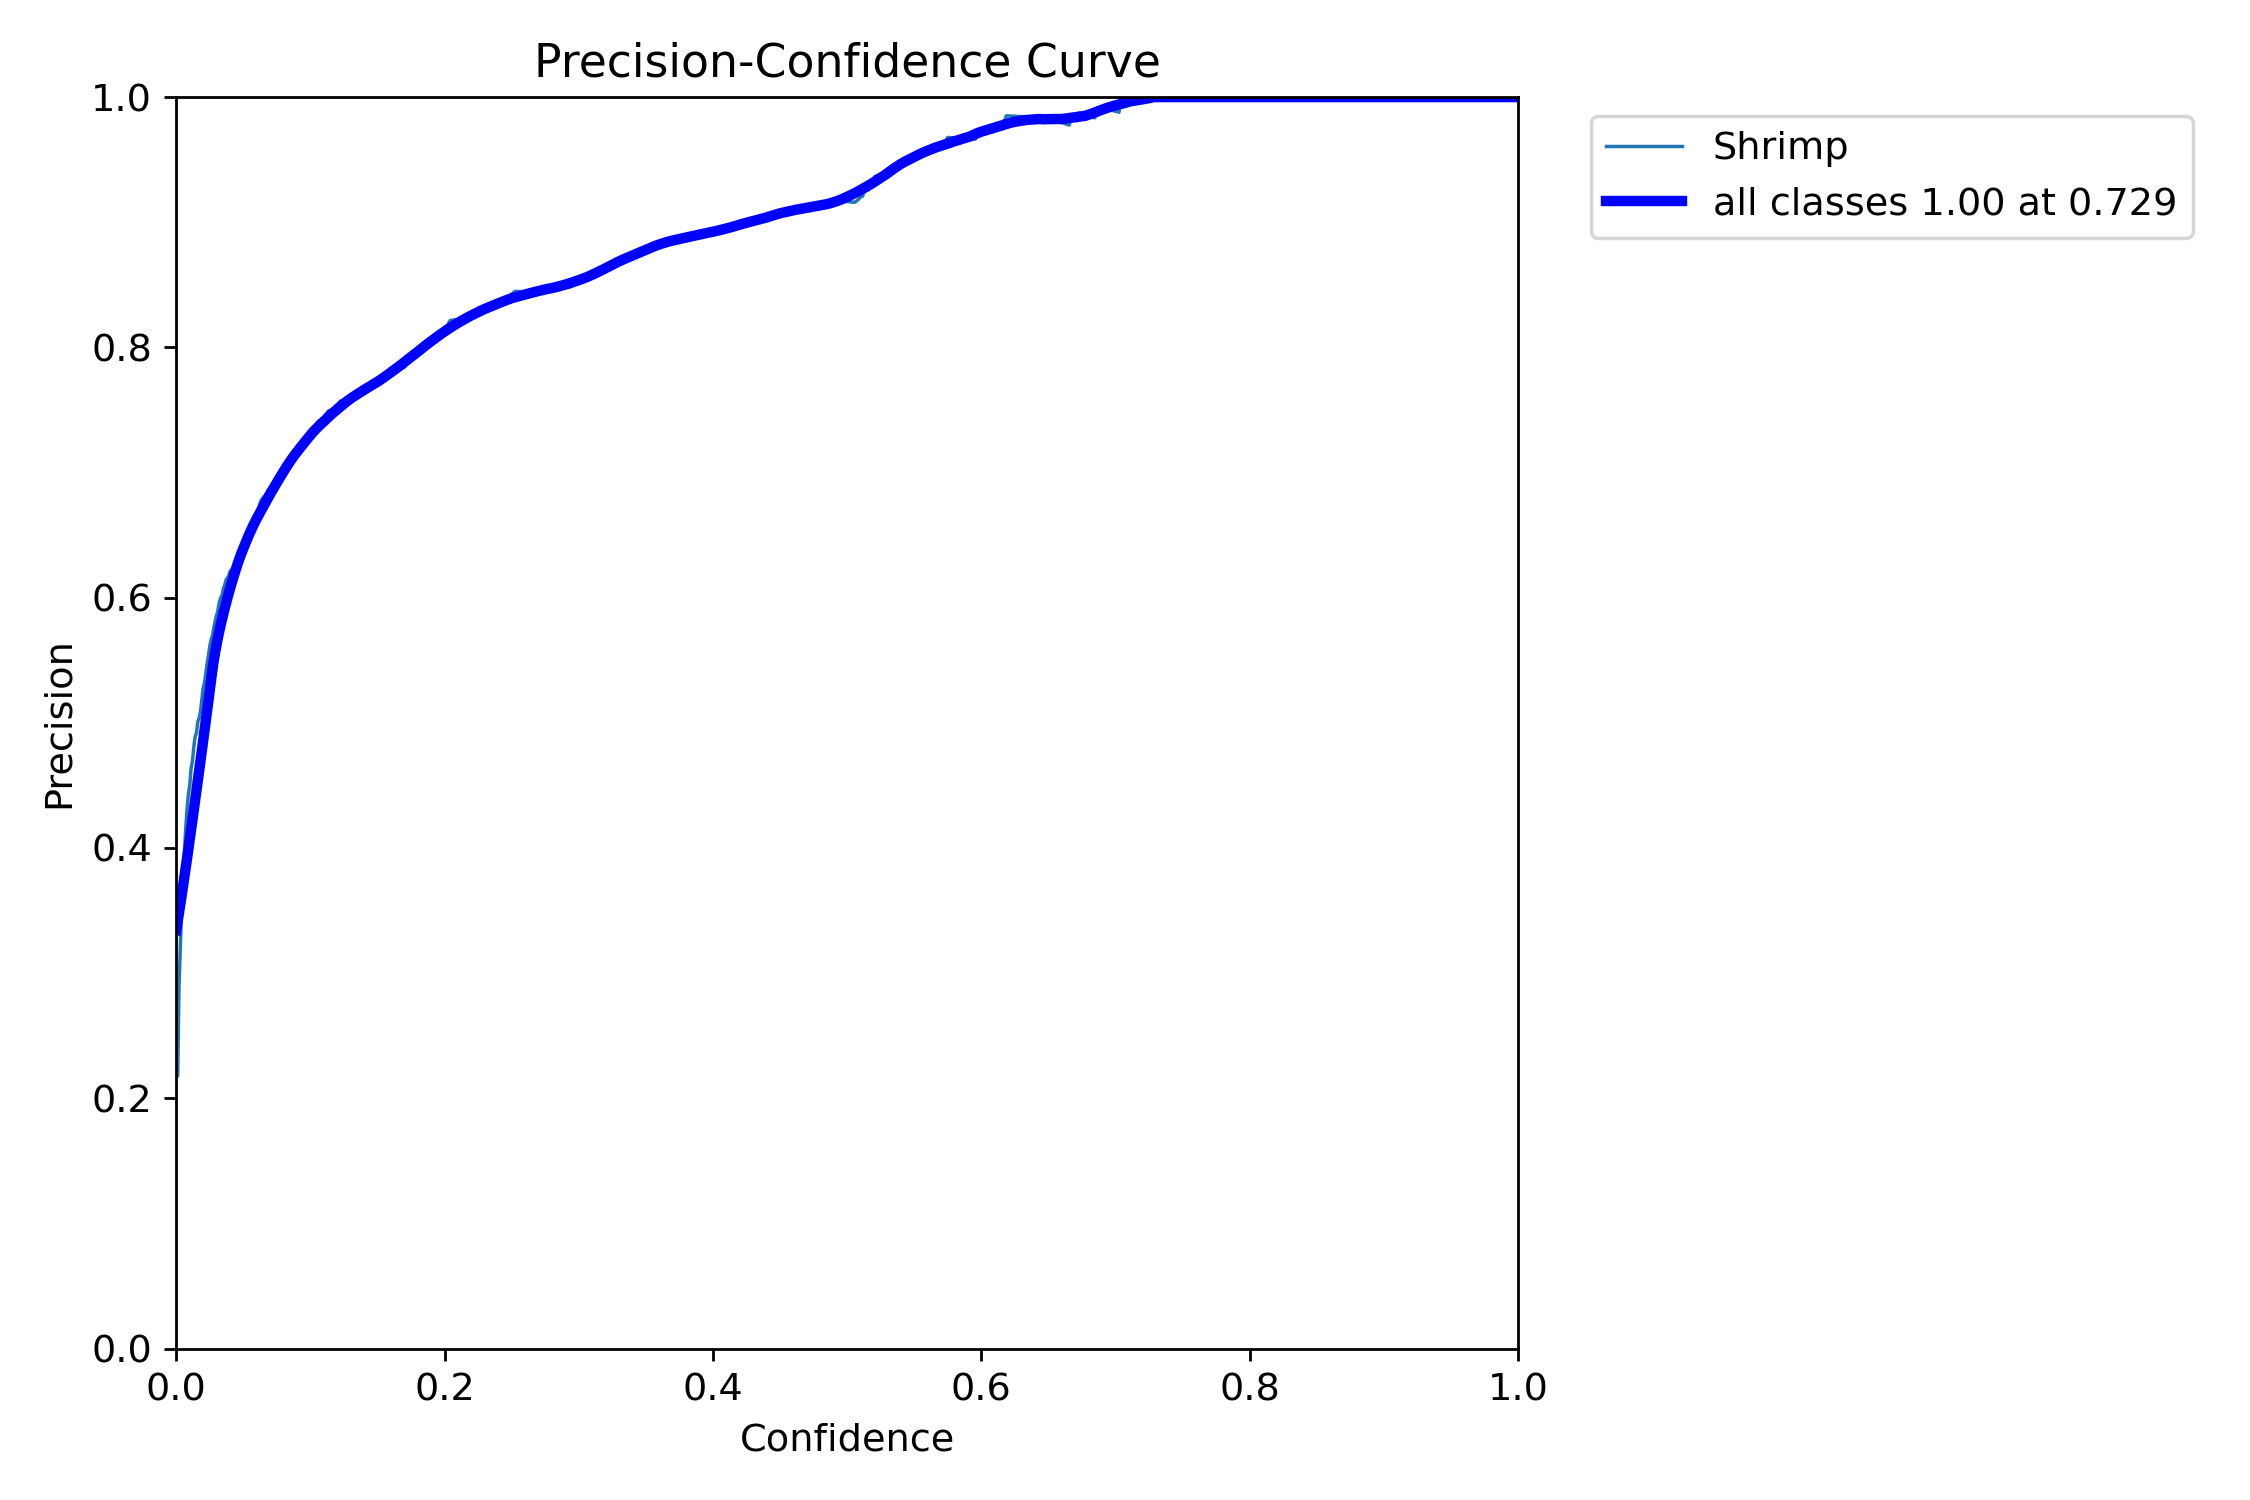

In [12]:
display.Image(filename=f'{HOME}/runs/detect/train/P_curve.png', width=600)

In [13]:
import plotly.express as px
import pandas as pd

df = pd.read_csv("/kaggle/working/runs/detect/train/results.csv")
fig = px.line(df, x='                  epoch', y='       metrics/mAP50(B)', title='mAP50')
fig.show()

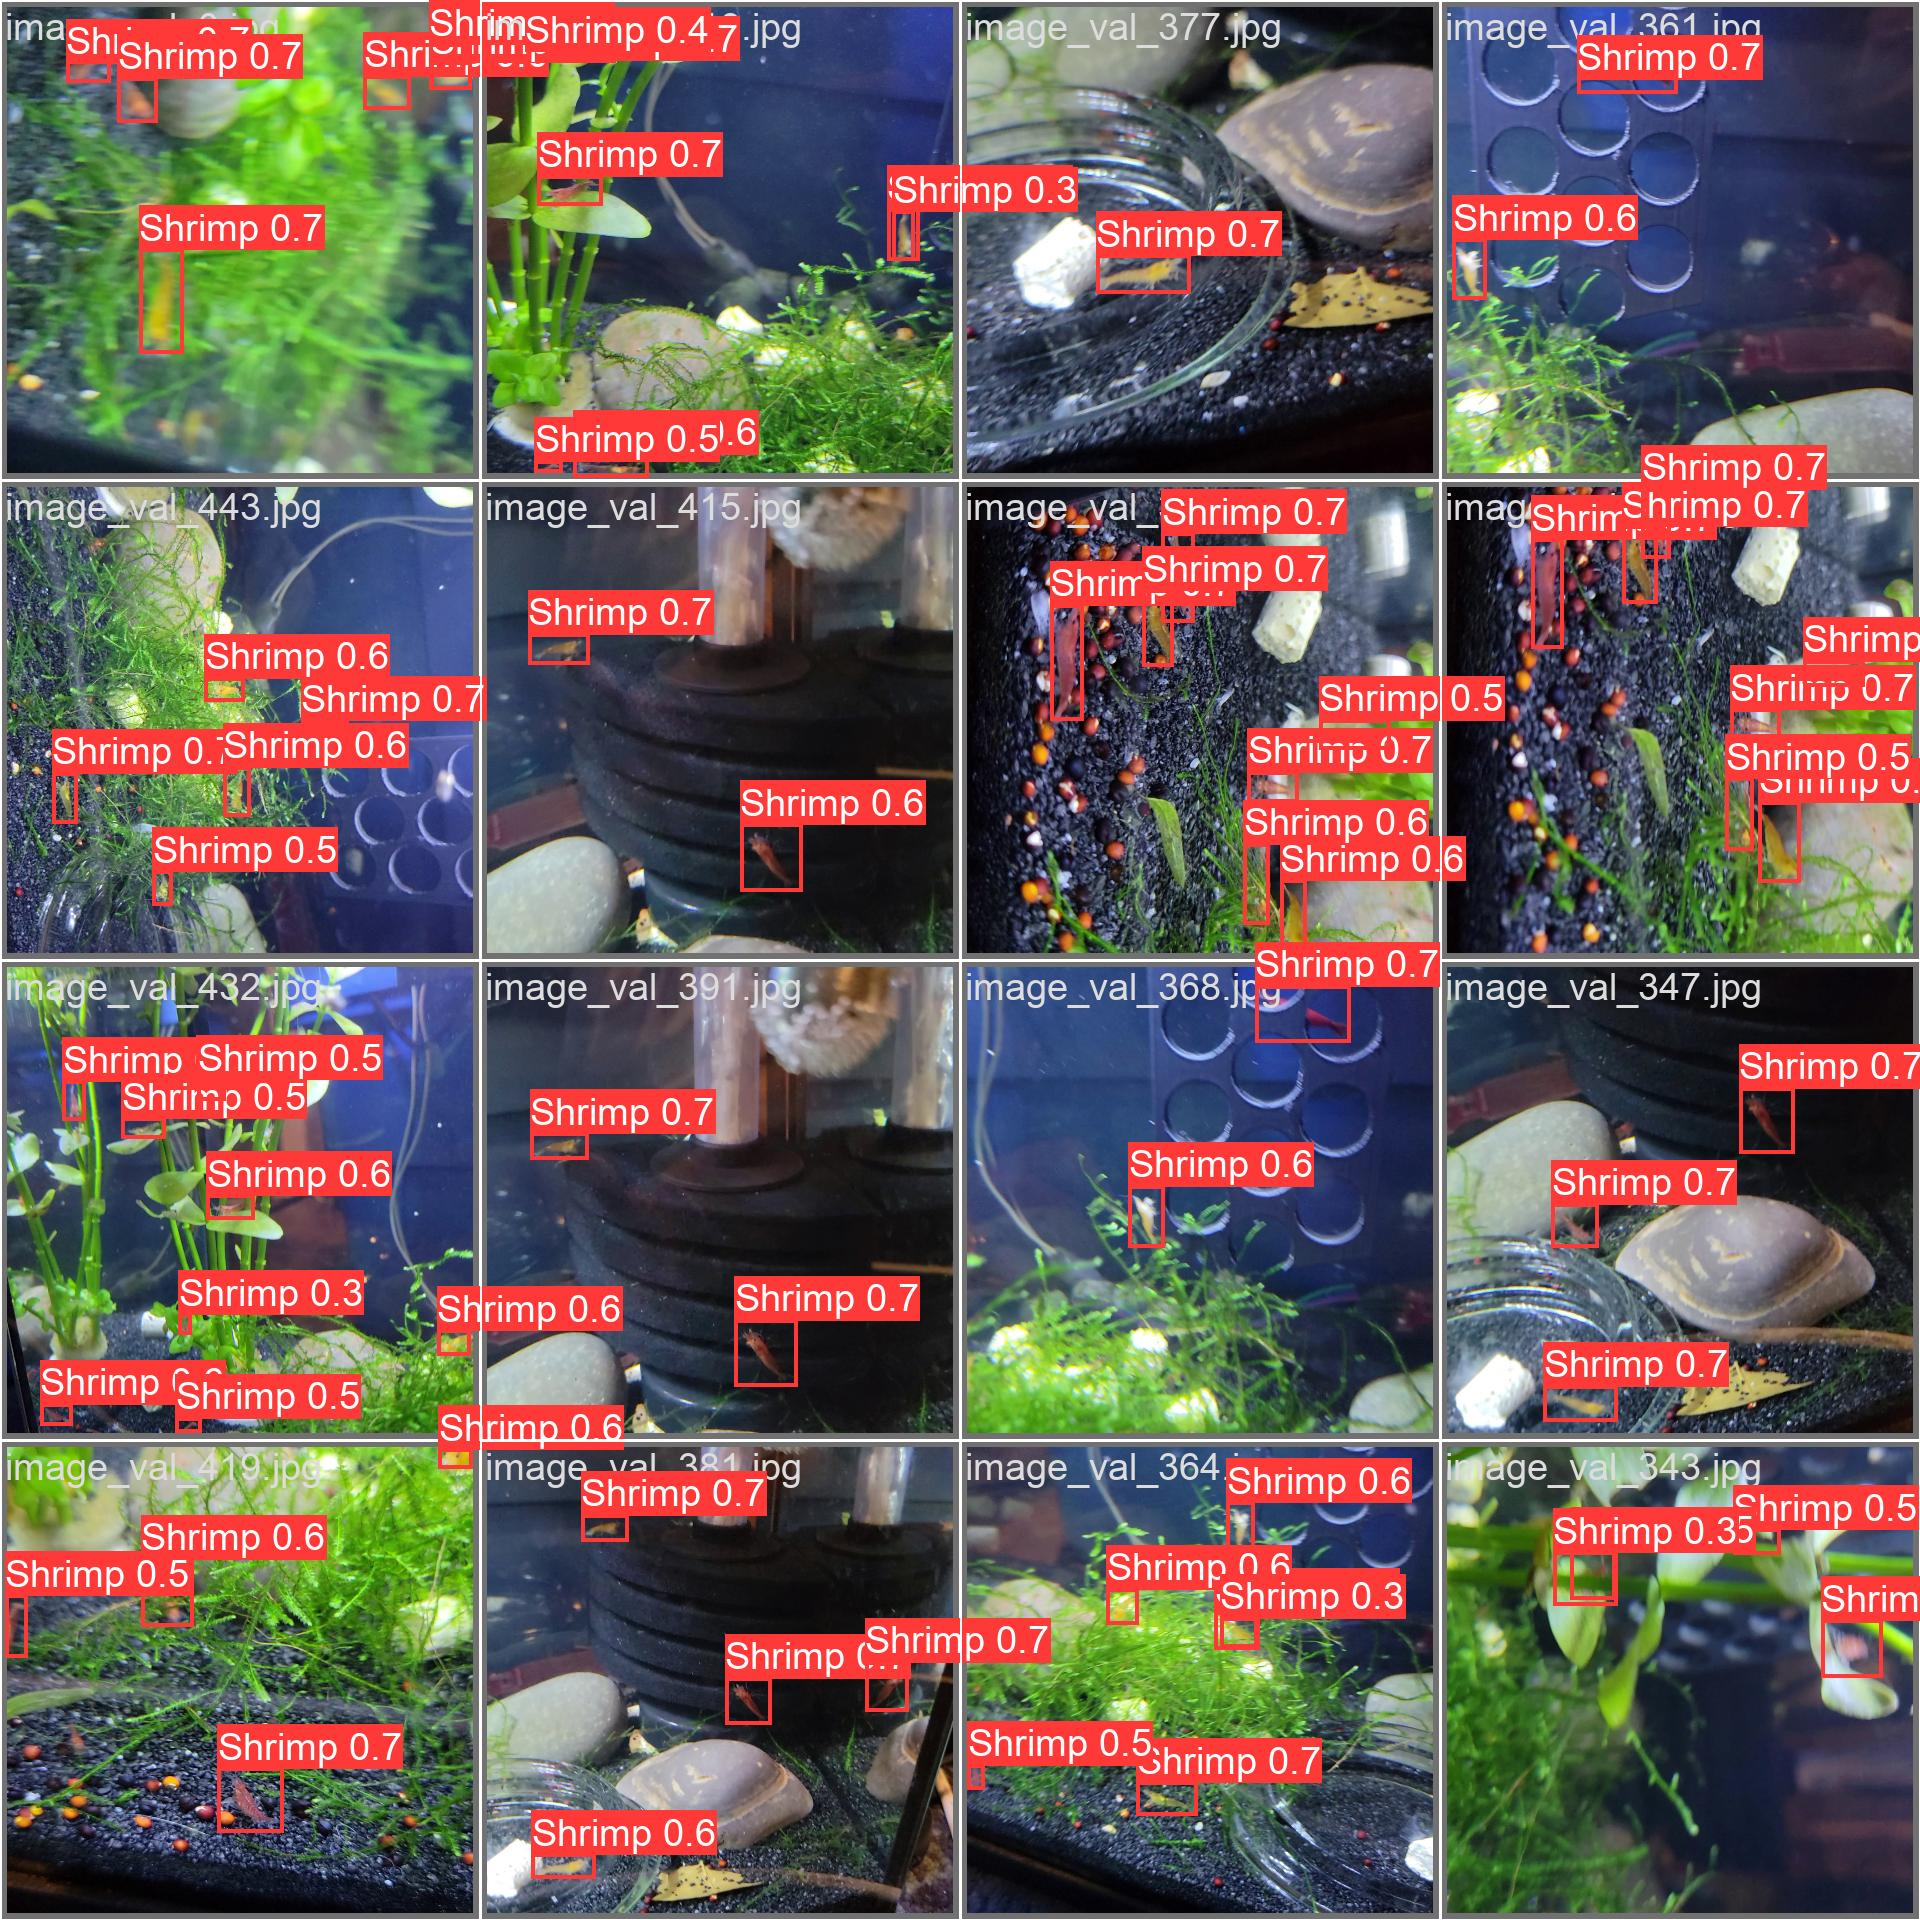

In [14]:
display.Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=2048)


0: 1024x1024 3 Shrimps, 12.9ms
Speed: 15.1ms preprocess, 12.9ms inference, 2.2ms postprocess per image at shape (1, 3, 1024, 1024)


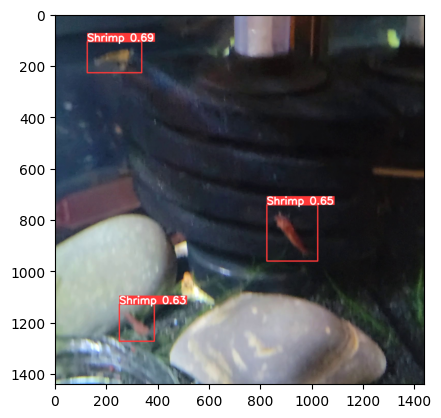

In [15]:
from ultralytics import YOLO
import cv2
from PIL import Image
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

#model.predict('/kaggle/input/inference-shrimp/20230926_201702.jpg', save=True, imgsz=512, conf=0.25, show=True)

results = model(['/kaggle/input/shrimp-dataset/project-10-at-2023-09-26-17-38-b449e4f8/images/video_1_1014.jpg'])


array_rgb = cv2.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB)
plt.imshow(array_rgb)